In [35]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import seaborn as sns
import re
import numpy as np

In [36]:
# 图片所在的文件夹
folder_path = '/data/mjy/Gait_recognition/data/001-1-000/001-1-000-001-skeleton'

# 创建空列表来存储灰度图像
gray_images = []

# 用于从文件名中提取数字的函数
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

# 获取文件夹中的所有文件，然后排序
filenames = os.listdir(folder_path)
filenames.sort(key=natural_keys)

# 遍历文件夹中的所有文件
for filename in filenames:
    # 检查文件是否是图片
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # 打开图片
        img = Image.open(os.path.join(folder_path, filename))
        # 转换为灰度
        gray_img = img.convert('L')
        gray_img = np.array(gray_img)
        # 将灰度图像添加到列表
        gray_images.append(gray_img)

print('All images have been converted to grayscale and stored in the list.')

All images have been converted to grayscale and stored in the list.


In [37]:
a = gray_images[0]
type(a)

numpy.ndarray

In [38]:
a.sum(), a.shape

(1808353, (480, 640))

In [39]:
indices = np.where((a != 0) & (a != 1) & (a != 2))

# 打印出这些位置
print(indices)

(array([ 32,  32,  32, ..., 454, 454, 455]), array([ 53,  76,  82, ..., 116, 126, 118]))


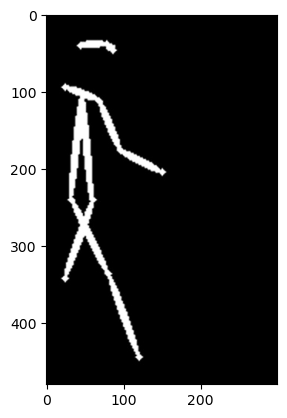

In [40]:
plt.imshow(a[:, :300], cmap='gray', vmin=0, vmax=255)
# plt.savefig('figure/3', bbox_inches='tight')
plt.show()

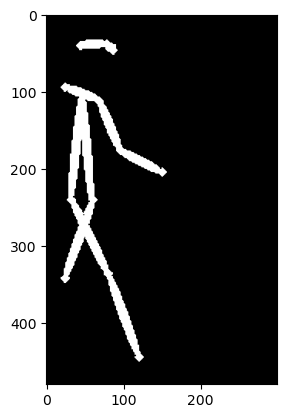

In [45]:
b = a.copy()
b[np.where(b<10)] = 0
b[np.where(b>=10)] = 255
plt.imshow(b[:, :300], cmap='gray', vmin=0, vmax=255)
# plt.savefig('figure/3', bbox_inches='tight')
plt.show()

In [48]:
# 图片所在的文件夹
folder_path = '/data/mjy/Gait_recognition/data/001-1-000/001-1-000-001-skeleton'

# 创建空列表来存储灰度图像
gray_images = []
crop_width = 160  # 需要截取的图片宽度

# 用于从文件名中提取数字的函数
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

# 获取文件夹中的所有文件，然后排序
filenames = os.listdir(folder_path)
filenames.sort(key=natural_keys)

# 遍历文件夹中的所有文件
for filename in filenames:
    # 检查文件是否是图片
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # 打开图片
        img = Image.open(os.path.join(folder_path, filename)).convert('L')
        # 将图片转换为numpy数组
        img_array = np.array(img)
        # 找到每一列是否存在非零元素
        non_zeros = np.any(img_array > 0, axis=0)
        # 找到最左边和最右边非零列的索引
        left_index, right_index = np.where(non_zeros)[0][[0, -1]]
        # 计算中点
        center = (left_index + right_index) // 2
        # 截取图片
        left = max(0, center - crop_width // 2)
        right = min(img.width, center + crop_width // 2)
        cropped_img = img.crop((left, 0, right, img.height))
        cropped_img = np.array(cropped_img)
        # 将灰度图像添加到列表
        gray_images.append(cropped_img)

print('All images have been cropped and stored in the list.')

All images have been cropped and stored in the list.


In [49]:
a = gray_images[0]
type(a)

numpy.ndarray

In [ ]:
b = a.copy()


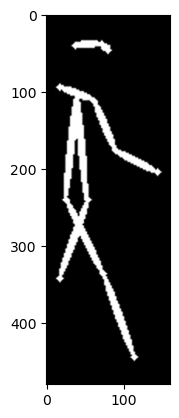

In [51]:
plt.imshow(a, cmap='gray', vmin=0, vmax=255)